In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=5) 

In [4]:
datos = pd.read_csv("Advertising.csv")
datos

Unnamed: 0     TV  Radio  Newspaper  Sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]

In [5]:
a = datos.TV
b = datos.Radio
c = datos.Sales

In [9]:
x = np.array([a,b]).T                 

x_poly = poly_reg.fit_transform(x)    
regr = LinearRegression()          
regr.fit(x_poly,c)         

LinearRegression()

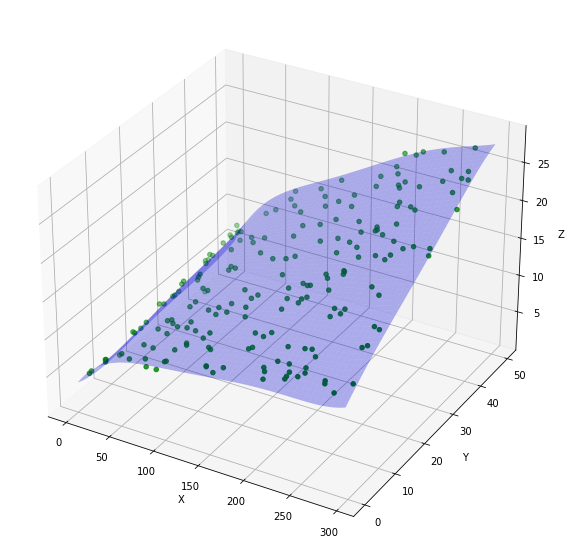

In [8]:

fig = plt.figure(figsize = (10,10))  
ax = plt.axes(projection='3d')       
ax.set_xlabel("X")                   
ax.set_ylabel("Y")                   
ax.set_zlabel("Z")                  

ax.scatter3D(a, b, c,c="green")      

x_pred = np.linspace(a.min(),a.max(),100)   
y_pred = np.linspace(b.min(),b.max(),100)  
z_pred = np.zeros(10000).reshape(100,100)  


X, Y = np.meshgrid(x_pred, y_pred)
for i in range(100):                 
  for k in range(100):               
    
    pred = regr.predict(poly_reg.fit_transform([[X[i][k], Y[i][k]]]))
    z_pred[i][k] = pred              

ax.plot_surface(X,Y,z_pred,color="blue",alpha=0.3) 


